In [3]:
library(cutoffR)
library(ggplot2)
library(sqldf)
library(dplyr)
library(sp)
library(spacetime)
library(xts)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



In [4]:
sensorlist<-read.csv("https://raw.githubusercontent.com/Maplub/MonthlyAirQuality/master/sensorlist.csv",stringsAsFactors = FALSE)
sensorlist[sensorlist$sensorid=="CU-S00054",1]<-"CU-S0054"
sensorlist[sensorlist$sensorid=="CU-S00083",1]<-"CU-S0083"
sensorlist[sensorlist$sensorid=="CU-S00103",1]<-"CU-S0103"
sensorlist[sensorlist$sensorid=="CU-S00104",1]<-"CU-S0104"
sensorlist$sensorid <- as.factor(sensorlist$sensorid)

In [5]:
hour<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_Mar_PM25_2561.csv")

In [6]:
hour[hour$sensorid=="CU-SOO94",1]<-"CU-S0094"

In [7]:
hour$timepos <- as.POSIXct(strptime(paste(hour$date,hour$h), "%Y-%m-%d %H"))

In [8]:
newhour<-hour[hour$timepos>="2018-03-06 00:00:00" & hour$timepos<="2018-03-08 23:00:00",]
newhour <- newhour[order(newhour$timepos, newhour$sensorid),]

### Dealing with missing value

In [9]:
datefull<-seq(from=min(newhour$timepos),to=max(newhour$timepos), by="hour")
sensor_newhour<-sqldf('select distinct(sensorid) from newhour')
fulldata<-merge(sensor_newhour,datefull)
colnames(fulldata)[2]<-'timepos'
newhour<-sqldf('select f.sensorid,f.timepos,n.pm25 from fulldata f LEFT JOIN newhour n ON f.sensorid = n.sensorid AND f.timepos=n.timepos')

In [10]:
count_na<-aggregate(pm25 ~ sensorid, data=newhour, function(x) {sum(is.na(x))}, na.action = NULL)
sensorFull<-count_na$sensorid[which(count_na$pm25<30)]
sensorFull

[1] CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 CU-S0008 CU-S0011 CU-S0013
 [9] CU-S0014 CU-S0015 CU-S0016 CU-S0017 CU-S0018 CU-S0021 CU-S0022 CU-S0023
[17] CU-S0024 CU-S0025 CU-S0026 CU-S0027 CU-S0028 CU-S0029 CU-S0030 CU-S0032
[25] CU-S0033 CU-S0034 CU-S0035 CU-S0040 CU-S0042 CU-S0045 CU-S0046 CU-S0047
[33] CU-S0050 CU-S0051 CU-S0052 CU-S0053 CU-S0054 CU-S0056 CU-S0059 CU-S0060
[41] CU-S0070 CU-S0071 CU-S0073 CU-S0076 CU-S0079 CU-S0081 CU-S0086 CU-S0090
[49] CU-S0093 CU-S0096 CU-S0098 CU-S0101 CU-S0102
89 Levels: CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 CU-S0008 ... CU-S0104

In [11]:
newhour<-subset(newhour,sensorid %in% sensorFull)

Recalculate the number of sensors

In [12]:
sensor_newhour<-sqldf('select distinct(sensorid) from newhour')

Warning message:
“Removed 78 rows containing missing values (geom_path).”

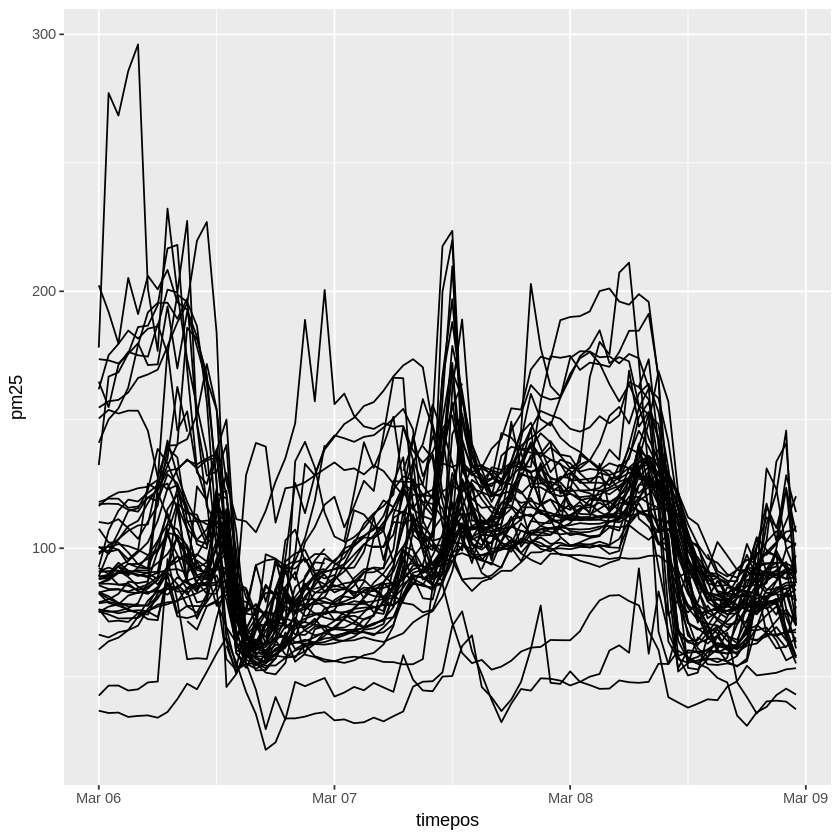

In [13]:
ggplot(data=newhour, aes(x=timepos, y=pm25, group=sensorid)) + geom_line()

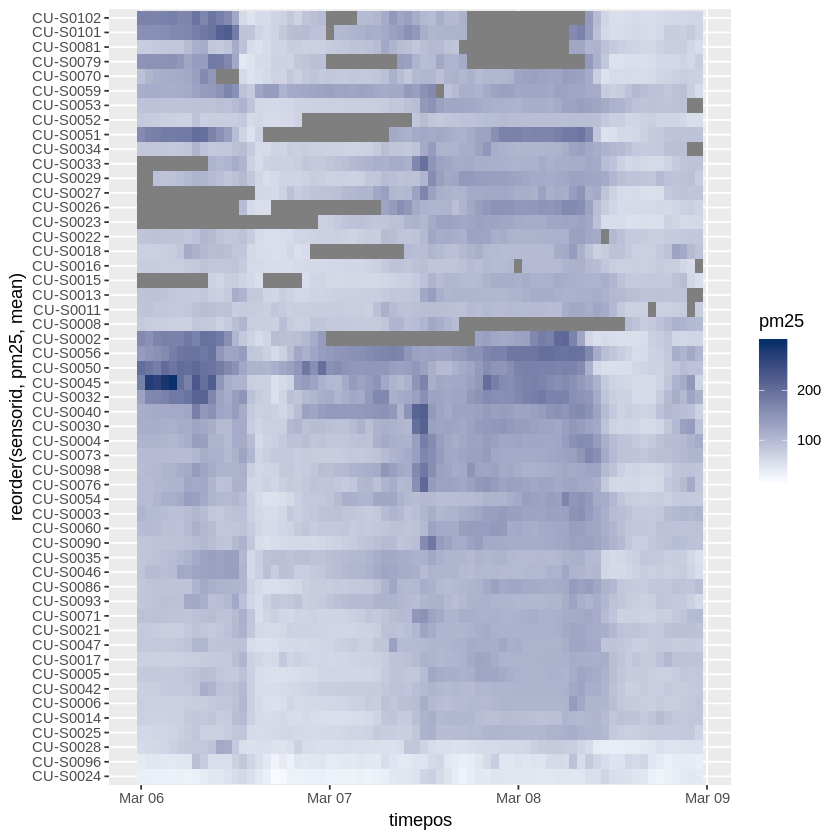

In [14]:
library(RColorBrewer)
colorsetting=brewer.pal(9,"Blues")
ggplot(data=newhour, aes(x=timepos, y=reorder(sensorid,pm25,mean))) + geom_tile(aes(fill=pm25)) + scale_fill_gradient(low=colorsetting[1],high=colorsetting[9])

In [121]:
library(reshape2)
mat_newhour<-acast(newhour, timepos~sensorid, value.var="pm25")

In [122]:
mat_newhour<-as.data.frame(mat_newhour)

In [123]:
mat_newhour$hour<-row.names(mat_newhour)

In [125]:
mat_newhour$hour <- as.POSIXct(mat_newhour$hour)

In [126]:
imputed<-Cut(mat_newhour)

ERROR: Error in -date: invalid argument to unary operator


In [110]:
nmissing(imputed)

[1] 258

In [120]:
sapply(mat_newhour, class)

$`CU-S0002`
[1] "numeric"

$`CU-S0003`
[1] "numeric"

$`CU-S0004`
[1] "numeric"

$`CU-S0005`
[1] "numeric"

$`CU-S0006`
[1] "numeric"

$`CU-S0008`
[1] "numeric"

$`CU-S0011`
[1] "numeric"

$`CU-S0013`
[1] "numeric"

$`CU-S0014`
[1] "numeric"

$`CU-S0015`
[1] "numeric"

$`CU-S0016`
[1] "numeric"

$`CU-S0017`
[1] "numeric"

$`CU-S0018`
[1] "numeric"

$`CU-S0021`
[1] "numeric"

$`CU-S0022`
[1] "numeric"

$`CU-S0023`
[1] "numeric"

$`CU-S0024`
[1] "numeric"

$`CU-S0025`
[1] "numeric"

$`CU-S0026`
[1] "numeric"

$`CU-S0027`
[1] "numeric"

$`CU-S0028`
[1] "numeric"

$`CU-S0029`
[1] "numeric"

$`CU-S0030`
[1] "numeric"

$`CU-S0032`
[1] "numeric"

$`CU-S0033`
[1] "numeric"

$`CU-S0034`
[1] "numeric"

$`CU-S0035`
[1] "numeric"

$`CU-S0040`
[1] "numeric"

$`CU-S0042`
[1] "numeric"

$`CU-S0045`
[1] "numeric"

$`CU-S0046`
[1] "numeric"

$`CU-S0047`
[1] "numeric"

$`CU-S0050`
[1] "numeric"

$`CU-S0051`
[1] "numeric"

$`CU-S0052`
[1] "numeric"

$`CU-S0053`
[1] "numeric"

$`CU-S0054`
[1] "numeric"

$`CU-S0056`
[1] "numeric"

$`CU-S0059`
[1] "numeric"

$`CU-S0060`
[1] "numeric"

$`CU-S0070`
[1] "numeric"

$`CU-S0071`
[1] "numeric"

$`CU-S0073`
[1] "numeric"

$`CU-S0076`
[1] "numeric"

$`CU-S0079`
[1] "numeric"

$`CU-S0081`
[1] "numeric"

$`CU-S0086`
[1] "numeric"

$`CU-S0090`
[1] "numeric"

$`CU-S0093`
[1] "numeric"

$`CU-S0096`
[1] "numeric"

$`CU-S0098`
[1] "numeric"

$`CU-S0101`
[1] "numeric"

$`CU-S0102`
[1] "numeric"

$date
[1] "POSIXct" "POSIXt"